In [38]:
import pickle

In [39]:
with open('timeseries_1000_filtered','rb') as f: time_series_loaded = pickle.load(f)

In [40]:
time_series_list = time_series_loaded

In [41]:
print(len(time_series_list))

307


In [42]:
# fix python path if working locally
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.utils.timeseries_generation import (
    gaussian_timeseries,
    linear_timeseries,
    sine_timeseries,
)
from darts.models import (
    RNNModel,
    TCNModel,
    TransformerModel,
    NBEATSModel,
    BlockRNNModel,
    VARIMA,
    RandomForest,
    TFTModel,
)
from darts.metrics import mape, smape, mae
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset, ElectricityDataset

import logging

logging.disable(logging.CRITICAL)

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

# for reproducibility
torch.manual_seed(1)
np.random.seed(1)

In [43]:
time_series_list_scaled = []

for time_series in time_series_list:
    scaler = Scaler()
    time_series_list_scaled.append(scaler.fit_transform(time_series))

In [44]:
# print(time_series_list_scaled[0].columns)
from darts import TimeSeries
temp = []
# Assuming you have a Darts TimeSeries object named 'ts'

# Convert the TimeSeries to a pandas DataFrame
for ts in time_series_list_scaled:
    df = ts.pd_dataframe()

    # Rename the columns in the pandas DataFrame
    new_column_names = ['Normalized Elapsed time (minutes)', 'Normalized Set B field (T)', 'Normalized B field (T)',
       'Normalized Ramp speed (T/min)', 'Normalized Voltage (V)', 'Normalized Inner Lower Temperature',
       'Normalized Outer Lower Temperature', 'Normalized Inner Upper Temperature',
       'Normalized Outer Upper Temperature', 'Normalized 1st Stage Temperature',
       'Normalized Shield Temperature', 'Normalized 2nd Stage Temperature']  # Replace with the new column names you want
    df.columns = new_column_names

    # Convert the modified pandas DataFrame back to a Darts TimeSeries
    temp.append(TimeSeries.from_dataframe(df))
time_series_list_scaled = temp
print(time_series_list_scaled[0].columns)

Index(['Normalized Elapsed time (minutes)', 'Normalized Set B field (T)',
       'Normalized B field (T)', 'Normalized Ramp speed (T/min)',
       'Normalized Voltage (V)', 'Normalized Inner Lower Temperature',
       'Normalized Outer Lower Temperature',
       'Normalized Inner Upper Temperature',
       'Normalized Outer Upper Temperature',
       'Normalized 1st Stage Temperature', 'Normalized Shield Temperature',
       'Normalized 2nd Stage Temperature'],
      dtype='object', name='component')


In [45]:
from darts import TimeSeries

covariates = []
for i in range(len(time_series_list)):
    ts_df = (time_series_list[i]).pd_dataframe()
    columns_to_keep = ['Set B field (T)']
    covariate_ts_df = ts_df[columns_to_keep]
    covariates.append(TimeSeries.from_dataframe(covariate_ts_df))


In [46]:
# updated_covariates = []
# for i in range(len(covariates)):
#     df = covariates[i].pd_dataframe()
#     # for time_series in time_series_list_scaled:
#     temp = time_series_list_scaled[i].pd_dataframe()
#     for col in temp.columns:
#         df[col] = temp[col]
#     updated_covariates.append(TimeSeries.from_dataframe(df))
    
# # print(updated_covariates[0].columns)
# covariates = updated_covariates

temp1 = []
from darts import concatenate
for df in time_series_list_scaled:
    storage = []
    for col in df.columns:
        storage.append(df[col])
    temp1.append(concatenate([timeSeries for timeSeries in storage], axis=1))

past_covariates = temp1

In [47]:
# past_covariates[1]

In [48]:
from darts import TimeSeries

# ts_df = ts.pd_dataframe()
time_final = []
for i in range(len(time_series_list)):
    ts_df = (time_series_list[i]).pd_dataframe()
    columns_to_keep = ['B field (T)', 'Voltage (V)', 'Ramp speed (T/min)', 'Inner Lower Temperature', 
            'Outer Lower Temperature', 'Inner Upper Temperature',
            'Outer Upper Temperature', '1st Stage Temperature',
            'Shield Temperature', '2nd Stage Temperature']
    covariate_ts_df = ts_df[columns_to_keep]
    time_final.append(TimeSeries.from_dataframe(covariate_ts_df))
    
print(len(time_final[0].columns ))
# time_final = time_series_list

10


In [49]:
print(len(time_final))

307


In [50]:
# load data
train, val = [], []
# VAL_LEN = 300
temp1, temp2 = [], []

# for i in range(len(time_final)):
#     series = time_final[i]
#     train.append(series[:-VAL_LEN])
#     val.append(series[-VAL_LEN:])
#     temp1.append(covariates[i][-VAL_LEN:])
#     temp2.append(covariates[i][:-VAL_LEN])
    
for i in range(len(time_final)):
    series = time_final[i]
    train.append(series)
    # val.append(series[-VAL_LEN:])
    temp1.append(covariates[i])
    temp2.append(covariates[i])

# for time_series in time_final:
#     series = time_series.astype(np.float32)
#     train.append(series[:-VAL_LEN])
#     val.append(series[-VAL_LEN:])
# ValueError: The dimensions of the series in the training set and the validation set do not match.
    
    
# for time_series in covariates:
#     series = time_series.astype(np.float32)
#     temp.append(series[:-VAL_LEN])
# val_past_covariates_past = temp1
covariates = temp2

val = train[300:]
train = train[:300]

future_covariates = covariates[300:]
covariates = covariates[:300]

val_past = past_covariates[300:]
past_covariates = past_covariates[:300]
# split in train / validation (note: in practice we would also need a test set)
# train, val = 


In [51]:
# train = train[:20]
# val = val[:20]
# covariates = covariates[:2]
# val_past_covariates_past = val_past_covariates_past[:2]

In [52]:
# class Trial():
#     def suggest_int(self, name, low, high):
#         return low
#     def suggest_categorical(self, name, cats):
#         return cats[0]
#     def suggest_float(self, name, low, high, log = False):
#         return low
        

In [ ]:
import numpy as np
import optuna
import torch
from optuna.integration import PyTorchLightningPruningCallback
from pytorch_lightning.callbacks import EarlyStopping
from sklearn.preprocessing import MaxAbsScaler

from darts.dataprocessing.transformers import Scaler
from darts.datasets import AirPassengersDataset
from darts.metrics import smape
from darts.models import TCNModel
from darts.utils.likelihood_models import GaussianLikelihood

# scale
# scaler = Scaler(MaxAbsScaler())
# train = scaler.fit_transform(train)
# val = scaler.transform(val)

# define objective function


pl_trainer_kwargs = {
    "accelerator": "gpu",
    "devices": [0],
    # "callbacks": callbacks,
}

encoders = None #look into add encoders

# reproducibility
torch.manual_seed(42)

model = TFTModel(
    input_chunk_length=52,
    output_chunk_length=33,
    batch_size=64,
    n_epochs=1,
    # nr_epochs_val_period=1,
    # num_encoder_layers = num_encoder_layers_temp,
    # num_decoder_layers = num_decoder_layers_temp,
    # d_model = d_model_length,
    # dropout=dropout,
    # optimizer_kwargs={"lr": lr},
    # add_encoders=encoders,
    # likelihood=GaussianLikelihood(),
    pl_trainer_kwargs=pl_trainer_kwargs,
    model_name="tft_model",
    force_reset=True,
    save_checkpoints=True,
)

# train the model
model.fit(
    series=train,
    val_series= val,
    # num_loader_workers=1,
    future_covariates = covariates,
    val_future_covariates= future_covariates,
    past_covariates = past_covariates,
    val_past_covariates =  val_past
)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

TFTModel(hidden_size=16, lstm_layers=1, num_attention_heads=4, full_attention=False, feed_forward=GatedResidualNetwork, dropout=0.1, hidden_continuous_size=8, categorical_embedding_sizes=None, add_relative_index=False, loss_fn=None, likelihood=None, norm_type=LayerNorm, use_static_covariates=True, input_chunk_length=52, output_chunk_length=33, batch_size=64, n_epochs=1, pl_trainer_kwargs={'accelerator': 'gpu', 'devices': [0]}, model_name=tft_model, force_reset=True, save_checkpoints=True)

In [55]:
import numpy as np
import optuna
import torch
from optuna.integration import PyTorchLightningPruningCallback
from pytorch_lightning.callbacks import EarlyStopping
from sklearn.preprocessing import MaxAbsScaler

from darts.dataprocessing.transformers import Scaler
from darts.datasets import AirPassengersDataset
from darts.metrics import smape
from darts.models import TCNModel
from darts.utils.likelihood_models import GaussianLikelihood

# scale
# scaler = Scaler(MaxAbsScaler())
# train = scaler.fit_transform(train)
# val = scaler.transform(val)

# define objective function
def objective(trial):
    # select input and output chunk lengths
    in_len = trial.suggest_int("in_len", 80, 180)
    out_len = trial.suggest_int("out_len", 5, in_len-1)
    # d_model_length = trial.suggest_int("d_model_length", 60, 68)
    num_encoder_layers_temp = trial.suggest_int("num_encoder_layers_temp", 2, 5)
    num_decoder_layers_temp = trial.suggest_int("num_decoder_layers_temp", 3, 7)
    # dim_feedforward_temp = trial.suggest_int("dim_feedforward_temp", 512, 2048)
    activation_temp =  trial.suggest_categorical("activation_temp", ["GatedResidualNetwork", "GLU", "Bilinear", "ReGLU", "GEGLU", "SwiGLU", "ReLU", "GELU"])
    # activation = activation_temp,
    
    kernel_size = trial.suggest_int("kernel_size", 4, 7)
    num_filters = trial.suggest_int("num_filters", 2, 4)
    weight_norm = trial.suggest_categorical("weight_norm", [False, True])
    dilation_base = trial.suggest_int("dilation_base", 3, 6)
    dropout = trial.suggest_float("dropout", 0.0, 0.3)
    lr = trial.suggest_float("lr", 5e-6, 1e-3, log=True)
    hidden_size_temp = trial.suggest_int("hidden_size", 12, 20)
    # include_year = trial.suggest_categorical("year", [False, True])

    # throughout training we'll monitor the validation loss for both pruning and early stopping
    pruner = PyTorchLightningPruningCallback(trial, monitor="val_loss")
    early_stopper = EarlyStopping("val_loss", min_delta=0.001, patience=3, verbose=True)
    callbacks = [pruner, early_stopper]
    
    num_workers = 4
        
    pl_trainer_kwargs = {
        "accelerator": "gpu",
        "devices": [0],
        "callbacks": callbacks,
    }

    encoders = None #look into add encoders

    # reproducibility
    torch.manual_seed(42)
    # kernel_size', 'num_filters', 'weight_norm', 'dilation_base']`
    # build the TCN model
    model = TFTModel(
        input_chunk_length=in_len,
        output_chunk_length=out_len,
        batch_size=512,
        n_epochs=1,
        feed_forward = activation_temp,
        hidden_size = hidden_size_temp,
        dropout=0.21429808749324997,
        optimizer_kwargs={"lr": 0.0003145556279481215},
        # add_encoders=encoders,
        # likelihood=GaussianLikelihood(),
        pl_trainer_kwargs=pl_trainer_kwargs,
        model_name="tft_model_3",
        force_reset=True,
        save_checkpoints=True,
    )

    # train the model
    VAL_LEN = 200
    model.fit(
        series=train,
        val_series= val,
        # num_loader_workers=1,
        future_covariates = covariates,
        val_future_covariates= future_covariates,
        past_covariates = past_covariates,
        val_past_covariates = val_past
    )
    
#     model.fit(
#         series=train,
#         past_covariates=covariates,
#     );

    # reload best model over course of training
    model = TFTModel.load_from_checkpoint("tft_model_3")
    
    # Evaluate how good it is on the validation set, using sMAPE
    # preds = model.predict(series=train[0], n=VAL_LEN)
    smapes = 0
    for i in range(len(val)):
        preds = model.predict(
            series=train[i][:500],
            # val_future_covariates = covariates[60 + i]
            future_covariates=covariates[i],
            past_covariates = past_covariates[i],
            n=VAL_LEN,
            # verbose=verbose,
        )
        smapes += smape(preds, train[i][500:500+VAL_LEN])
    smapes = smapes/len(val)
    smape_val = np.mean(smapes)
    # if smape_val== np.nan:
    #     print("nan")
    return smape_val if smape_val != np.nan else float("inf")


# for convenience, print some optimization trials information
def print_callback(study, trial):
    print(f"Current value: {trial.value}, Current params: {trial.params}")
    print(f"Best value: {study.best_value}, Best params: {study.best_trial.params}")


# optimize hyperparameters by minimizing the sMAPE on the validation set
def run_trial():
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=3, callbacks=[print_callback])
        
if __name__ == "__main__":
    run_trial()
    # objective(Trial())


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Current value: 86.19821154645511, Current params: {'in_len': 167, 'out_len': 112, 'num_encoder_layers_temp': 3, 'num_decoder_layers_temp': 4, 'activation_temp': 'SwiGLU', 'kernel_size': 5, 'num_filters': 2, 'weight_norm': False, 'dilation_base': 3, 'dropout': 0.11116737577633551, 'lr': 4.751285795164828e-05, 'hidden_size': 19}
Best value: 86.19821154645511, Best params: {'in_len': 167, 'out_len': 112, 'num_encoder_layers_temp': 3, 'num_decoder_layers_temp': 4, 'activation_temp': 'SwiGLU', 'kernel_size': 5, 'num_filters': 2, 'weight_norm': False, 'dilation_base': 3, 'dropout': 0.11116737577633551, 'lr': 4.751285795164828e-05, 'hidden_size': 19}


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

FileNotFoundError: There is no file matching prefix best-* in /storage/rwp2/Pipeline/Dask/filtered/darts_logs/tft_model_3/checkpoints

In [54]:
len(train[0])

1000

In [30]:
# fix python path if working locally
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import os

from darts import TimeSeries
from darts.utils.timeseries_generation import (
    gaussian_timeseries,
    linear_timeseries,
    sine_timeseries,
)
from darts.models import (
    RNNModel,
    TCNModel,
    TransformerModel,
    NBEATSModel,
    BlockRNNModel,
    VARIMA,
)
from darts.metrics import mape, smape, mae
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset, ElectricityDataset

import logging

logging.disable(logging.CRITICAL)

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

# for reproducibility
torch.manual_seed(1)
np.random.seed(1)

In [25]:
cd filtered

/storage/rwp2/Pipeline/Dask/filtered


In [55]:
num = 0

In [56]:
print(len(train[1]))

4000


In [57]:
# temp = train[1][:7000+VAL_LEN]

In [58]:
cd split

[Errno 2] No such file or directory: 'split'
/storage/rwp2/Pipeline/Dask/filtered


In [59]:
loaded_model = TFTModel.load_from_checkpoint('tft_model_2')

In [73]:
n_forecast = len(val[num])  # Replace `test` with your test set
n_forecast = 40
pred_series = loaded_model.predict(n=n_forecast, future_covariates = covariates[num], series=train[num][:3000], past_covariates = past_covariates[num][:3000])  # Adjust the `n` parameter as needed

ValueError: For the given forecasting horizon `n=40`, the provided past covariates at dataset index `0` do not extend far enough into the future. As `n > output_chunk_length` the past covariates must end at time step `2019-02-21 15:01:00`, whereas now they end at time step `2019-02-21 14:54:00`.

In [103]:
# n_forecast = len(temp)  # Replace `test` with your test set
# pred_series = loaded_model.predict(n=n_forecast, series=train[num][:300])  # Adjust the `n` parameter as needed

In [104]:
from darts.metrics import mape, rmse

smape_score = smape(pred_series, train[num][3000:])  # Replace `test` with your true future values
rmse_score = rmse(pred_series, train[num][3000:])  # Replace `test` with your true future values

print(f"SMAPE: {smape_score:.2f}%")
print(f"RMSE: {rmse_score:.2f}")

SMAPE: 26.04%
RMSE: 5.59


In [105]:
print(np.mean(smape_score))

26.03947915136814


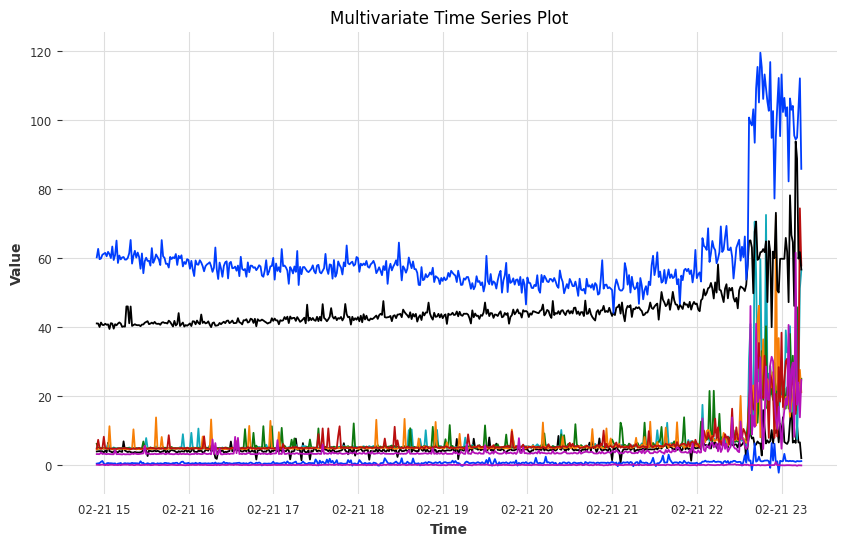

In [106]:
import matplotlib.pyplot as plt
from darts import TimeSeries

# Assuming you have a multivariate Darts time series named 'multivariate_time_series'

# Convert the Darts time series to a Pandas DataFrame
df = (pred_series).pd_dataframe()

# Plotting the multivariate time series
plt.figure(figsize=(10, 6))

# Plot each variable separately
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Multivariate Time Series Plot')
# plt.legend()
plt.grid(True)
plt.show()


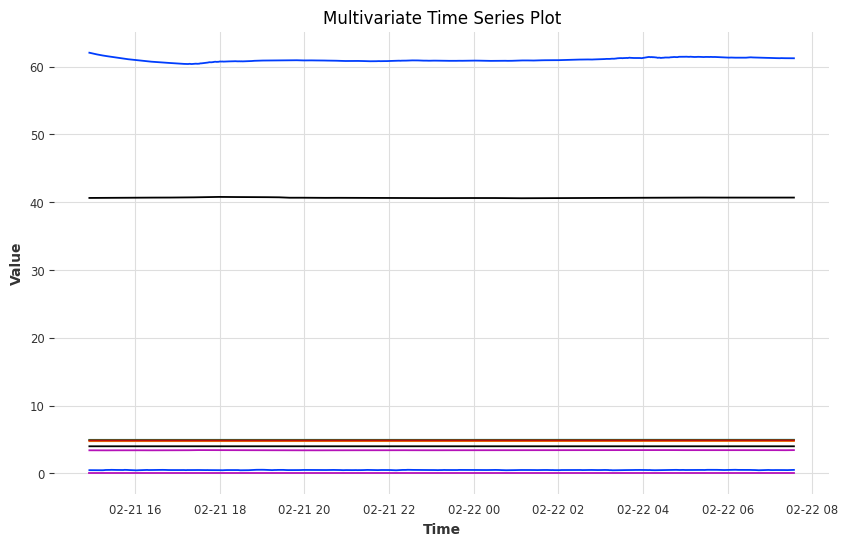

In [107]:
import matplotlib.pyplot as plt
from darts import TimeSeries

# Assuming you have a multivariate Darts time series named 'multivariate_time_series'

# Convert the Darts time series to a Pandas DataFrame
df = (train[num][3000:]).pd_dataframe()
# df = (val[num]).pd_dataframe()

# Plotting the multivariate time series
plt.figure(figsize=(10, 6))

# Plot each variable separately
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Multivariate Time Series Plot')
# plt.legend()
plt.grid(True)
plt.show()


In [ ]:
I 2023-07-31 16:21:07,924] Trial 92 finished with value: 
    140.74493944644928 and parameters: {'d_model_length': 67, 'dilation_base': 4, 
                                        'dropout': 0.05325962047210396, 'in_len': 69, 'kernel_size': 5, 
                                        'lr': 0.00035671372383447384, 'num_decoder_layers_temp': 3, 'num_encoder_layers_temp': 5, 
                                        'num_filters': 3, 'out_len': 31, 'weight_norm': False}. Best is trial 92 with value: 140.74493944644928.

In [64]:
pickled_model = pickle.load(open("regression_1.pkl",'rb'))


In [66]:
pickled_model.predict(train[num])

ValueError: Input series has to be provided after fitting on multiple series.